<a href="https://colab.research.google.com/github/vanessabrolim/comfort_analysis/blob/master/HMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!pip install pomegranate
import numpy as np
import pandas as pd
from pomegranate import *
from matplotlib import *
import datetime
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive',  force_remount=True)

Mounted at /content/drive


In [39]:
data = pd.read_pickle('drive/My Drive/Udesc/train.pkl')
data.reset_index(inplace=True)
data = data.drop('date_time', 1)
data = data.drop('index', 1)
data = data.drop('comfort_geral', 1)
data_acc = pd.read_pickle('drive/My Drive/Udesc/train.pkl')
data_acc.reset_index(inplace=True)

data.head()

,engine_rpm,engine_load,intake_manifold_pressure,accelerator_pedal,speed,giroscope_x,giroscope_y,giroscope_z,accelerometer_x_avg,accelerometer_y_avg,accelerometer_z_avg,accelerometer_x_std,accelerometer_y_std,accelerometer_z_std,comfort_x,comfort_y,comfort_z
0,NaN,NaN,NaN,NaN,23.223407,-2.72,3.59,-0.34,1.016963,-0.059846,0.120445,0.194853,0.155698,0.172987,2.0,2.0,2.0
1,1034.423358,55.391512,111.343066,92.270318,3.223987,-0.77,-0.31,-4.57,1.005749,-0.099241,0.110642,0.217798,0.205179,0.219697,4.0,4.0,4.0
2,1487.816867,9.590048,118.028169,21.461805,22.807823,-2.05,0.98,4.51,1.024716,-0.063518,0.128107,0.109880,0.089158,0.083585,3.0,4.0,4.0
3,NaN,NaN,NaN,NaN,8.774839,-2.20,0.19,-2.51,1.015846,-0.079579,0.139395,0.035262,0.018842,0.042641,3.0,3.0,3.0
4,NaN,NaN,NaN,NaN,13.601787,-1.16,-0.10,-2.03,1.012846,-0.077933,0.137599,0.048181,0.030723,0.042666,4.0,4.0,4.0


In [40]:
shape = data.shape
data = data.fillna(numpy.nan)
data.head()

,engine_rpm,engine_load,intake_manifold_pressure,accelerator_pedal,speed,giroscope_x,giroscope_y,giroscope_z,accelerometer_x_avg,accelerometer_y_avg,accelerometer_z_avg,accelerometer_x_std,accelerometer_y_std,accelerometer_z_std,comfort_x,comfort_y,comfort_z
0,NaN,NaN,NaN,NaN,23.223407,-2.72,3.59,-0.34,1.016963,-0.059846,0.120445,0.194853,0.155698,0.172987,2.0,2.0,2.0
1,1034.423358,55.391512,111.343066,92.270318,3.223987,-0.77,-0.31,-4.57,1.005749,-0.099241,0.110642,0.217798,0.205179,0.219697,4.0,4.0,4.0
2,1487.816867,9.590048,118.028169,21.461805,22.807823,-2.05,0.98,4.51,1.024716,-0.063518,0.128107,0.109880,0.089158,0.083585,3.0,4.0,4.0
3,NaN,NaN,NaN,NaN,8.774839,-2.20,0.19,-2.51,1.015846,-0.079579,0.139395,0.035262,0.018842,0.042641,3.0,3.0,3.0
4,NaN,NaN,NaN,NaN,13.601787,-1.16,-0.10,-2.03,1.012846,-0.077933,0.137599,0.048181,0.030723,0.042666,4.0,4.0,4.0


In [41]:
d = data.copy()
columns = ['engine_rpm', 'engine_load', 'intake_manifold_pressure', 'accelerator_pedal', 'speed', 'giroscope_x', 'giroscope_y', 'giroscope_z']
for c in columns:
  d[c] = d[c].fillna(d[c].mean())
d.head()

,engine_rpm,engine_load,intake_manifold_pressure,accelerator_pedal,speed,giroscope_x,giroscope_y,giroscope_z,accelerometer_x_avg,accelerometer_y_avg,accelerometer_z_avg,accelerometer_x_std,accelerometer_y_std,accelerometer_z_std,comfort_x,comfort_y,comfort_z
0,1233.486699,26.227108,136.271720,32.786051,23.223407,-2.72,3.59,-0.34,1.016963,-0.059846,0.120445,0.194853,0.155698,0.172987,2.0,2.0,2.0
1,1034.423358,55.391512,111.343066,92.270318,3.223987,-0.77,-0.31,-4.57,1.005749,-0.099241,0.110642,0.217798,0.205179,0.219697,4.0,4.0,4.0
2,1487.816867,9.590048,118.028169,21.461805,22.807823,-2.05,0.98,4.51,1.024716,-0.063518,0.128107,0.109880,0.089158,0.083585,3.0,4.0,4.0
3,1233.486699,26.227108,136.271720,32.786051,8.774839,-2.20,0.19,-2.51,1.015846,-0.079579,0.139395,0.035262,0.018842,0.042641,3.0,3.0,3.0
4,1233.486699,26.227108,136.271720,32.786051,13.601787,-1.16,-0.10,-2.03,1.012846,-0.077933,0.137599,0.048181,0.030723,0.042666,4.0,4.0,4.0


In [42]:
d2 = data.copy()
columns = ['engine_rpm', 'engine_load', 'intake_manifold_pressure', 'accelerator_pedal', 'speed', 'giroscope_x', 'giroscope_y', 'giroscope_z']
for c in columns:
  d2[c] = d2[c].fillna(0)
d2.head()

,engine_rpm,engine_load,intake_manifold_pressure,accelerator_pedal,speed,giroscope_x,giroscope_y,giroscope_z,accelerometer_x_avg,accelerometer_y_avg,accelerometer_z_avg,accelerometer_x_std,accelerometer_y_std,accelerometer_z_std,comfort_x,comfort_y,comfort_z
0,0.000000,0.000000,0.000000,0.000000,23.223407,-2.72,3.59,-0.34,1.016963,-0.059846,0.120445,0.194853,0.155698,0.172987,2.0,2.0,2.0
1,1034.423358,55.391512,111.343066,92.270318,3.223987,-0.77,-0.31,-4.57,1.005749,-0.099241,0.110642,0.217798,0.205179,0.219697,4.0,4.0,4.0
2,1487.816867,9.590048,118.028169,21.461805,22.807823,-2.05,0.98,4.51,1.024716,-0.063518,0.128107,0.109880,0.089158,0.083585,3.0,4.0,4.0
3,0.000000,0.000000,0.000000,0.000000,8.774839,-2.20,0.19,-2.51,1.015846,-0.079579,0.139395,0.035262,0.018842,0.042641,3.0,3.0,3.0
4,0.000000,0.000000,0.000000,0.000000,13.601787,-1.16,-0.10,-2.03,1.012846,-0.077933,0.137599,0.048181,0.030723,0.042666,4.0,4.0,4.0


In [43]:
d3 = data.copy()
columns = ['engine_rpm', 'engine_load', 'intake_manifold_pressure', 'accelerator_pedal', 'speed', 'giroscope_x', 'giroscope_y', 'giroscope_z']
for c in columns:
  d3[c] = d3[c].fillna(d3[c].median())
d3.head()

,engine_rpm,engine_load,intake_manifold_pressure,accelerator_pedal,speed,giroscope_x,giroscope_y,giroscope_z,accelerometer_x_avg,accelerometer_y_avg,accelerometer_z_avg,accelerometer_x_std,accelerometer_y_std,accelerometer_z_std,comfort_x,comfort_y,comfort_z
0,1265.206813,15.172646,124.087678,31.753677,23.223407,-2.72,3.59,-0.34,1.016963,-0.059846,0.120445,0.194853,0.155698,0.172987,2.0,2.0,2.0
1,1034.423358,55.391512,111.343066,92.270318,3.223987,-0.77,-0.31,-4.57,1.005749,-0.099241,0.110642,0.217798,0.205179,0.219697,4.0,4.0,4.0
2,1487.816867,9.590048,118.028169,21.461805,22.807823,-2.05,0.98,4.51,1.024716,-0.063518,0.128107,0.109880,0.089158,0.083585,3.0,4.0,4.0
3,1265.206813,15.172646,124.087678,31.753677,8.774839,-2.20,0.19,-2.51,1.015846,-0.079579,0.139395,0.035262,0.018842,0.042641,3.0,3.0,3.0
4,1265.206813,15.172646,124.087678,31.753677,13.601787,-1.16,-0.10,-2.03,1.012846,-0.077933,0.137599,0.048181,0.030723,0.042666,4.0,4.0,4.0


In [0]:
cov = numpy.eye(shape[1])
kmodel = KMeans(5).fit(d3)
mu = kmodel.cluster_centers_

In [0]:
s1 = State(MultivariateGaussianDistribution(mu[0], cov))
s2 = State(MultivariateGaussianDistribution(mu[1], cov))
s3 = State(MultivariateGaussianDistribution(mu[2], cov))
s4 = State(MultivariateGaussianDistribution(mu[3], cov))
s5 = State(MultivariateGaussianDistribution(mu[4], cov))

In [0]:
model = HiddenMarkovModel()

In [0]:
model.add_states(s1, s2, s3, s4, s5)

In [0]:
states = [s1, s2, s3, s4, s5]


for i in range(0,5):
  model.add_transition(model.start, states[i], 0.2)

for idx, val in enumerate(states):
  for i in range(0,5):
    model.add_transition(states[idx], states[i], 0.2)
    
for i in range(0,5):
  model.add_transition(states[i], model.end, 0.2)

In [0]:
model.bake()

In [50]:
model.dense_transition_matrix()

array([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.        , 0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.        , 0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.        , 0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.        , 0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.        , 0.16666667],
       [0.2       , 0.2       , 0.2       , 0.2       , 0.2       ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [51]:
#model.forward_backward(data.iloc[0])
#model.viterbi(data.iloc[0])
#model.log_probability(data.iloc[0])
#model.forward(data.iloc[0])
#model.backward(data.iloc[0])
model.predict(d3.iloc[1])


[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]

In [0]:
b = np.zeros(shape = (shape[0], shape[1]))
for i in range(0, shape[1]):
    b[i] = d3.iloc[i]

In [53]:
model.fit(b, verbose = True)

TypeError: ignored

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 277, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
TypeError: Cannot cast ufunc subtract output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


ValueError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 65, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
ValueError: covariance matrix is not invertible.


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 6-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 6-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


ValueError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 65, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
ValueError: covariance matrix is not invertible.


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 2-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 6-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 2-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


ValueError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 65, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
ValueError: covariance matrix is not invertible.


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 2-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 5-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


ValueError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 65, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
ValueError: covariance matrix is not invertible.


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 5-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 5-th leading minor of the array is not positive definite


ValueError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 65, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
ValueError: covariance matrix is not invertible.


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


ValueError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 65, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
ValueError: covariance matrix is not invertible.


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 5-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 2-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


ValueError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 65, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
ValueError: covariance matrix is not invertible.


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 6-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 2-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 5-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 5-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 2-th leading minor of the array is not positive definite


ValueError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 65, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
ValueError: covariance matrix is not invertible.


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 2-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


ValueError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 65, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
ValueError: covariance matrix is not invertible.


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 2-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 2-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 5-th leading minor of the array is not positive definite


ValueError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 65, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
ValueError: covariance matrix is not invertible.


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 6-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 2-th leading minor of the array is not positive definite


ValueError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 65, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
ValueError: covariance matrix is not invertible.


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


ValueError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 65, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
ValueError: covariance matrix is not invertible.


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 2-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


ValueError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 65, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
ValueError: covariance matrix is not invertible.


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 2-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 2-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 5-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 5-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


ValueError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 65, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
ValueError: covariance matrix is not invertible.


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 6-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 5-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 2-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 5-th leading minor of the array is not positive definite


ValueError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 65, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
ValueError: covariance matrix is not invertible.


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


ValueError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 65, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
ValueError: covariance matrix is not invertible.


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 6-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 10-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 3-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 6-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 10-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


LinAlgError: ignored

Exception ignored in: 'pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution._log_probability_missing'
Traceback (most recent call last):
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 72, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.__cinit__
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 91, in cholesky
    check_finite=check_finite)
  File "/usr/local/lib/python3.6/dist-packages/scipy/linalg/decomp_cholesky.py", line 40, in _cholesky
    "definite" % info)
numpy.linalg.LinAlgError: 4-th leading minor of the array is not positive definite


[1] Improvement: nan	Time (s): 5.572
Total Training Improvement: nan
Total Training Time (s): 7.1043


{
    "class" : "HiddenMarkovModel",
    "name" : "None",
    "start" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-start",
        "weight" : 1.0
    },
    "end" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-end",
        "weight" : 1.0
    },
    "states" : [
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "name" : "MultivariateGaussianDistribution",
                "parameters" : [
                    [
                        1244.0995974431257,
                        7.586322960731099,
                        62.043838891450655,
                        519.1412493577118,
                        460.67255485306873,
                        612.2432487390829,
                        1.795000000835862,
                        1119.3131441647142,
                        705.7056192748211,
                        929.5564694501

In [54]:
model.dense_transition_matrix()

array([[1.17485858e-01, 1.37359387e-01, 4.20487112e-01, 7.38631302e-03,
        2.42358028e-01, 0.00000000e+00, 7.49233022e-02],
       [8.76496126e-06, 9.40894050e-01, 1.07242752e-04, 1.57769302e-04,
        1.40239380e-04, 0.00000000e+00, 5.86919336e-02],
       [8.75485381e-02, 8.05326298e-02, 1.41469610e-01, 7.60470884e-02,
        5.86271688e-01, 0.00000000e+00, 2.81304455e-02],
       [6.44864699e-02, 2.40749488e-01, 1.50534494e-01, 1.07477690e-01,
        3.46470801e-01, 0.00000000e+00, 9.02810579e-02],
       [4.81418843e-02, 3.20945910e-02, 9.49499844e-02, 1.79721025e-01,
        4.56091034e-01, 0.00000000e+00, 1.89001481e-01],
       [1.48720999e-04, 9.99851279e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [55]:
model.predict(d3.iloc[1500])

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

NameError: ignored

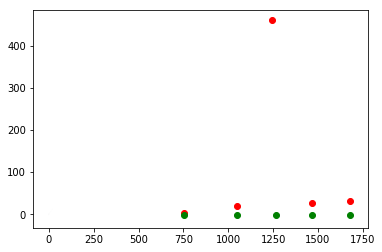

In [57]:
plt.plot(data.T[0], data.T[4],c='k',lw=0.005) #the data
for i in range(0,5): #the model means
    plt.scatter(model.states[i].distribution.mu[0],
                model.states[i].distribution.mu[4],
                c='r',
                label="HMM clusters upon convergence")
    plt.scatter(kmodel.cluster_centers_[i][0],
                kmodel.cluster_centers_[i][5],
                c='g',
                label="k_means initial clusters")


In [58]:
data.T[5]

engine_rpm                       NaN
engine_load                      NaN
intake_manifold_pressure         NaN
accelerator_pedal                NaN
speed                       0.008994
giroscope_x                -1.280000
giroscope_y                -0.120000
giroscope_z                -2.340000
accelerometer_x_avg         1.017532
accelerometer_y_avg         0.075067
accelerometer_z_avg         0.114341
accelerometer_x_std         0.003272
accelerometer_y_std         0.003435
accelerometer_z_std         0.004588
comfort_x                   4.000000
comfort_y                   4.000000
comfort_z                   4.000000
Name: 5, dtype: float64